# STUDENT PERFORMANCE EDA AND VISUALIZATION


# Student Performance Analysis
we are going to analyze the factors affecting student’s performance in the examination and Marks secured by the students in
high school Students from the United States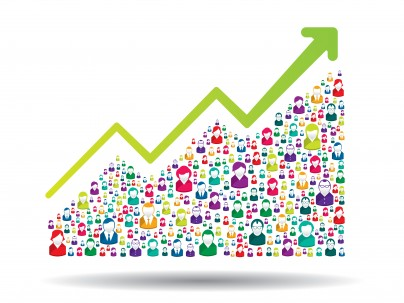

# Data Set Information:
This data approach student achievement in examination. The data attributes include student marks in different subjects, race/ethnicity, parental level of education,gender and lunch. dataset is provided regarding the performance in three distinct subjects: Mathematics (mat),Reading and Writing. we can get the data from https://www.kaggle.com/spscientist/students-performance-in-exams .

# Goal:
Our goal is to analyze how all the factors are a􀁼ecting students performance and predict
whether the student will pass or not in his examination.

### Analysis:
To start with our problem, we first need to import all the dependencies that we will use
later.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

#### minimum marks  to pass in a exam is 40

In [2]:
passmark=40

####  Data :

In [3]:
student_report=pd.read_csv("stu.csv")

In [4]:
student_report.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
for i,col in enumerate(student_report.columns):
    print(i+1,". column is ",col)

1 . column is  gender
2 . column is  race/ethnicity
3 . column is  parental level of education
4 . column is  lunch
5 . column is  test preparation course
6 . column is  math score
7 . column is  reading score
8 . column is  writing score


Size of data frame

In [6]:
student_report.shape

(1000, 8)

Let us understand about the basic information of the data, like min, max, mean and standard deviation etc

In [7]:
student_report.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### description
The features described in the above data set are:

1. Count tells us the number of NoN-empty rows in a feature.

2. Mean tells us the mean value of that feature.

3. Std tells us the Standard Deviation Value of that feature.

4. Min tells us the minimum value of that feature.

5. 25%, 50%, and 75% are the percentile/quartile of each features.

6. Max tells us the maximum value of that feature

# Let us explore the Math Score first
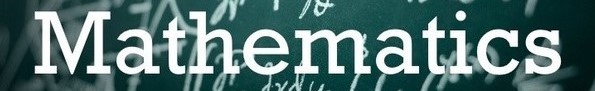

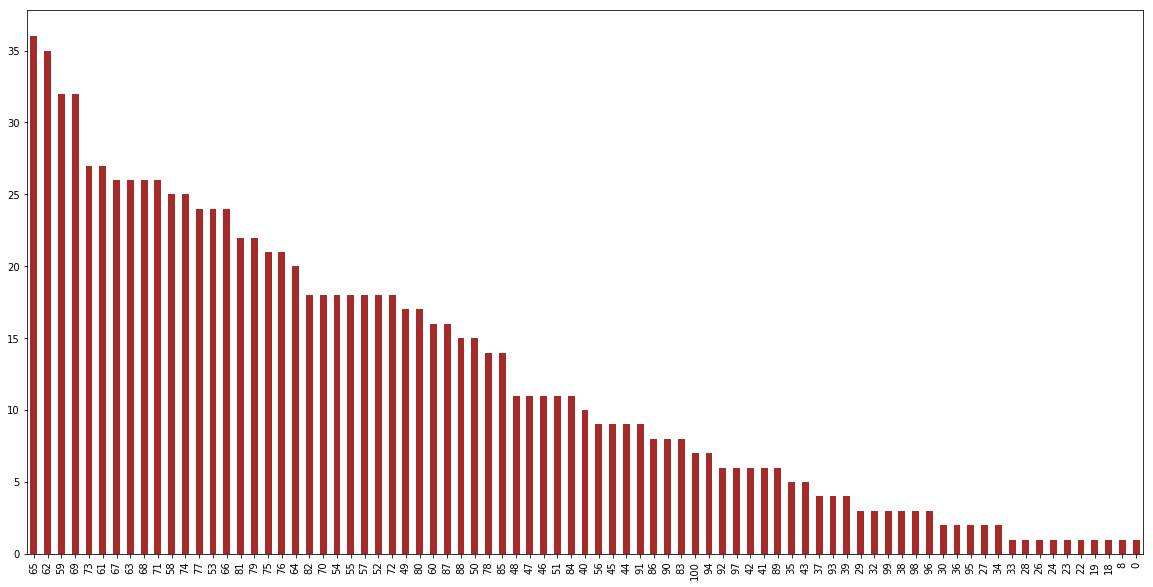

In [10]:

student_report['math score'].value_counts().plot(kind='bar', color='brown',figsize=(20,10))

In [11]:
matplotlib inline

#### In a Mathematics examination 96% of the candidate passed.

P tells the number of student got pass where F tells the candidate who failed in exam.

P    960
F     40
Name: Math_PassStatus, dtype: int64


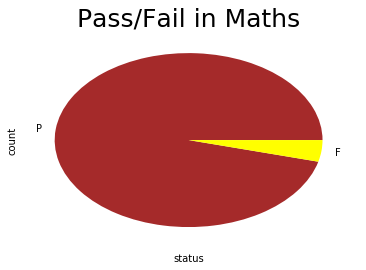

In [12]:
student_report['Math_PassStatus'] = np.where(student_report['math score']< passmark, 'F', 'P')
print(student_report.Math_PassStatus.value_counts())
student_report['Math_PassStatus'].value_counts().plot.pie(colors = ['brown', 'yellow'])

plt.title('Pass/Fail in Maths', fontweight = 10, fontsize = 25)
plt.xlabel('status')
plt.ylabel('count')
plt.show()

# let us explore the reading score
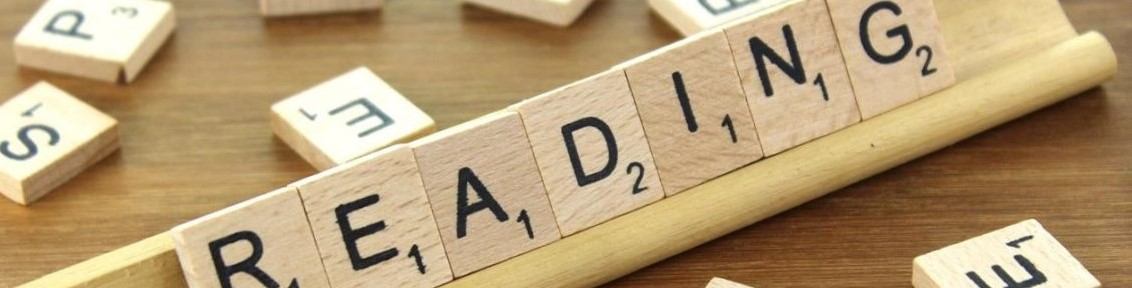

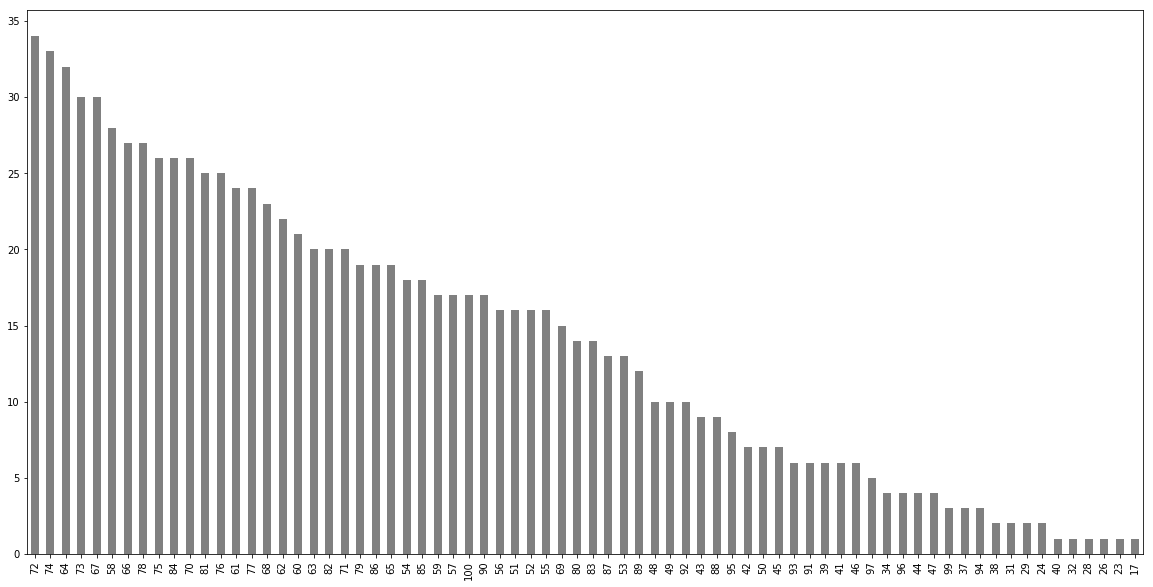

In [13]:
student_report['reading score'].value_counts().plot(kind='bar', color='grey',figsize=(20,10))

#### In a Reading examination 97.4% of the candidate passed and rest got failed

Pass status in reading is more then pass status of other two subject

P    974
F     26
Name: reading_PassStatus, dtype: int64


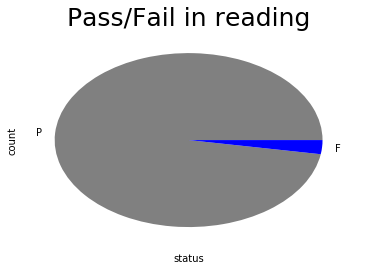

In [14]:
student_report['reading_PassStatus'] = np.where(student_report['reading score']< passmark, 'F', 'P')
print(student_report.reading_PassStatus.value_counts())
student_report['reading_PassStatus'].value_counts().plot.pie(colors = ['grey', 'blue'])

plt.title('Pass/Fail in reading', fontweight = 10, fontsize = 25)
plt.xlabel('status')
plt.ylabel('count')
plt.show()

# let us explore the writing score
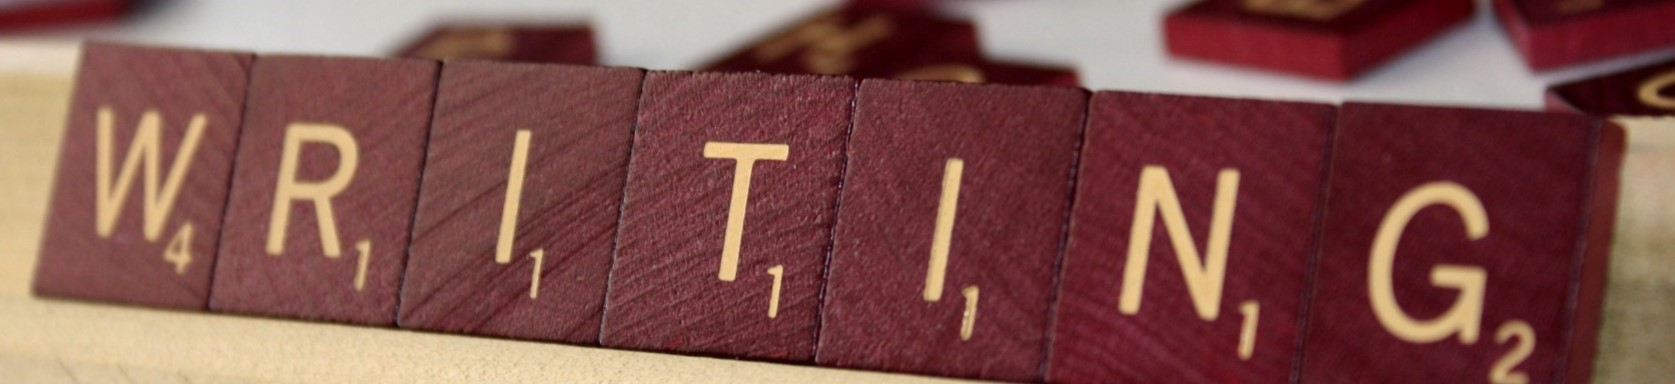

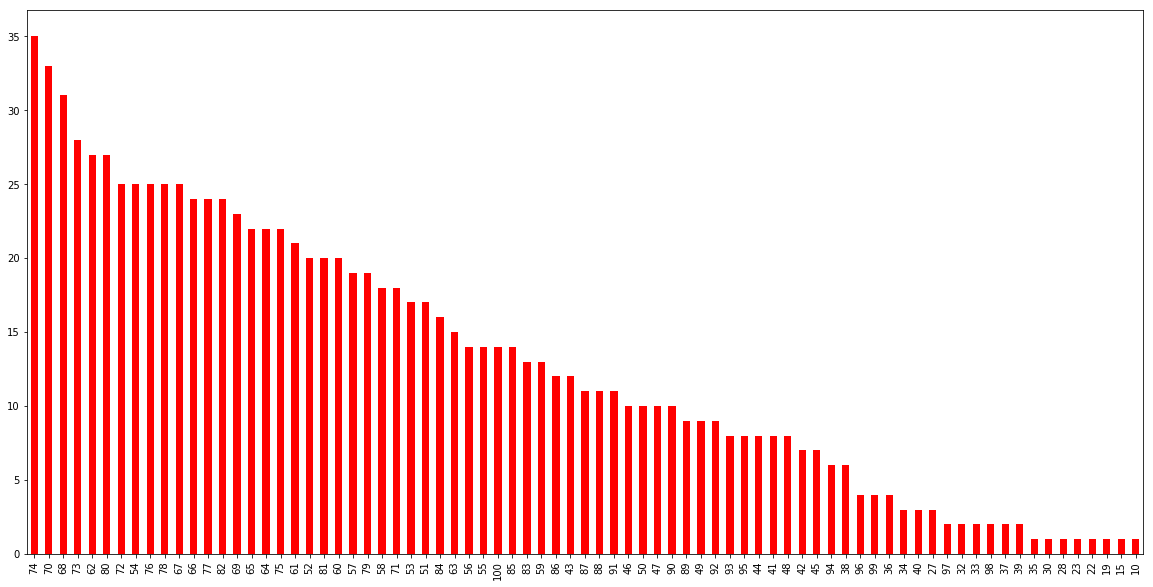

In [15]:
student_report['writing score'].value_counts().plot(kind='bar', color='red',figsize=(20,10))

#### the pass status in writing is in-between the pass status of other two subjects

P    968
F     32
Name: writing_PassStatus, dtype: int64


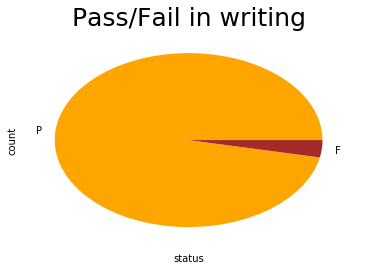

In [16]:
student_report['writing_PassStatus'] = np.where(student_report['writing score']< passmark, 'F', 'P')
print(student_report.writing_PassStatus.value_counts())
student_report['writing_PassStatus'].value_counts().plot.pie(colors = ['orange','brown'])

plt.title('Pass/Fail in writing', fontweight = 10, fontsize = 25)
plt.xlabel('status')
plt.ylabel('count')
plt.show()

# Classifying Students as Passed or Failed
A student is classified failed if he/she has failed in any one of three subjects otherwise he/she is classified as passed.
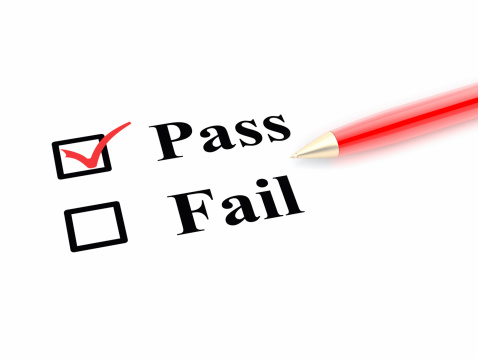


P    949
F     51
Name: status, dtype: int64


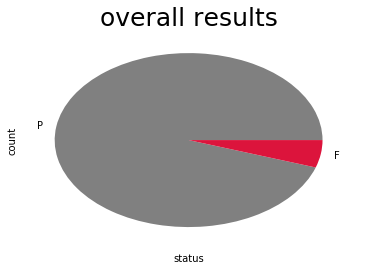

In [17]:
student_report['status'] = student_report.apply(lambda x : 'F' if x['Math_PassStatus'] == 'F' or 
                           x['reading_PassStatus'] == 'F' or x['writing_PassStatus'] == 'F'
                           else 'P', axis = 1)
print(student_report.status.value_counts())

student_report['status'].value_counts().plot.pie(colors = ['grey', 'crimson'])
plt.title('overall results', fontweight = 10, fontsize = 25)
plt.xlabel('status')
plt.ylabel('count')
plt.show()

## percentage score of all the students



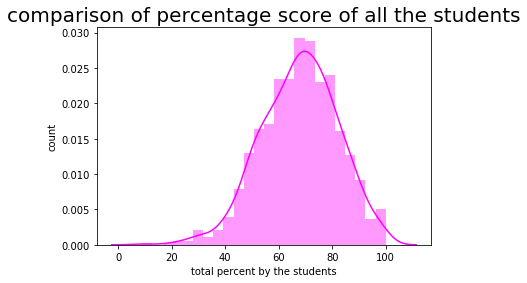

In [18]:
student_report['Total_Marks'] = student_report['math score']+student_report['reading score']+student_report['writing score']
student_report['Percentage'] = student_report['Total_Marks']/3

sns.distplot(student_report['Percentage'], color = 'magenta')

plt.title('comparison of percentage score of all the students', fontweight = 30, fontsize = 20)
plt.xlabel('total percent by the students')
plt.ylabel('count')
plt.show()

# Let us assign the grades
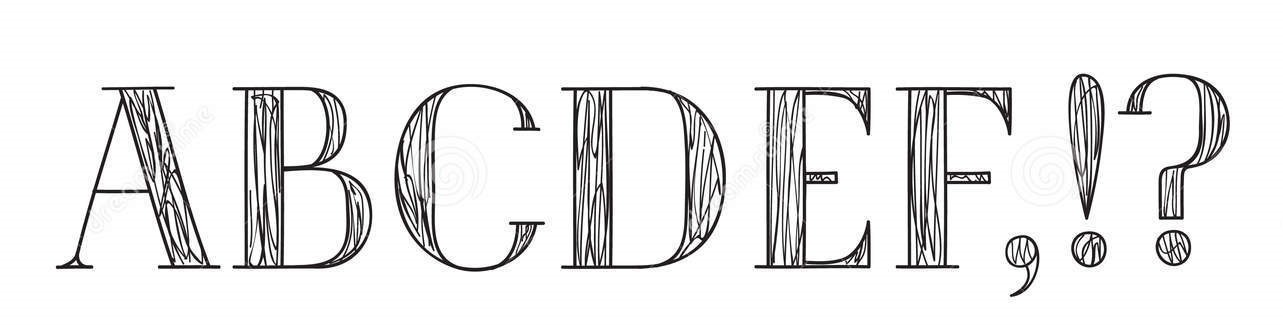
Grading

above 80 = A Grade

70 to 80 = B Grade

60 to 70 = C Grade

50 to 60 = D Grade

40 to 50 = E Grade

below 40 = F Grade ( means Fail )


B    261
C    256
A    198
D    178
E     56
F     51
Name: Grade, dtype: int64


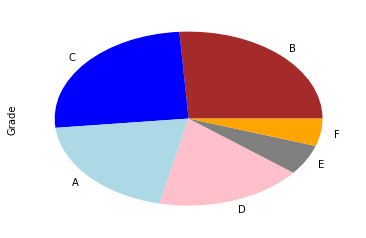

In [19]:
def Grade(Percentage, status):
    if ( status == 'F'):
        return 'F'    
    if ( Percentage >= 80 ):
        return 'A'
    if ( Percentage >= 70):
        return 'B'
    if ( Percentage >= 60):
        return 'C'
    if ( Percentage >= 50):
        return 'D'
    if ( Percentage >= 40):
        return 'E'
    else: 
        return 'F'

student_report['Grade'] = student_report.apply(lambda x : Grade(x['Percentage'], x['status']), axis=1)
print(student_report.Grade.value_counts())
student_report.Grade.value_counts().plot.pie(colors=['brown','blue','lightblue','pink','grey','orange'])

# Gender :
To start with gender , it’ll be good if we see how many of all the students are girls and boys:

To evaluate the difference in performance of boys and girls, we’ll again use box plot.



In average female student’s have better performance than male students, since the mean score of girls is higher than boys and the high scores(except few) .

female    518
male      482
Name: gender, dtype: int64

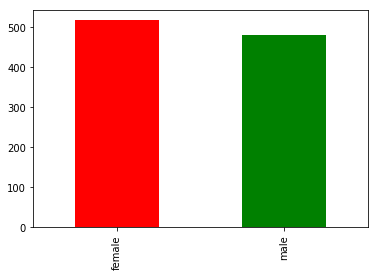

In [20]:

student_report['gender'].value_counts().plot(kind='bar',color='rg')
student_report['gender'].value_counts()

,math score,reading score,writing score,Total_Marks,Percentage
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


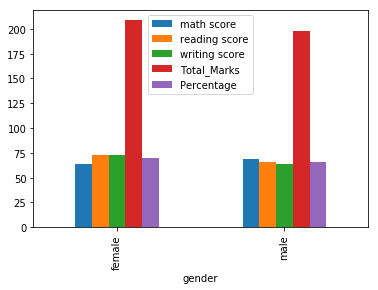

In [21]:

student_report.groupby(['gender']).mean().plot(kind='bar')
student_report.groupby(['gender']).mean()

###### People from group E have higher score in all three categories, where as people from group A have the lowest score in all three categories

,math score,reading score,writing score,Total_Marks,Percentage
race/ethnicity,,,,,
group A,61.629213,64.674157,62.674157,188.977528,62.992509
group B,63.452632,67.352632,65.600000,196.405263,65.468421
group C,64.463950,69.103448,67.827586,201.394984,67.131661
group D,67.362595,70.030534,70.145038,207.538168,69.179389
group E,73.821429,73.028571,71.407143,218.257143,72.752381


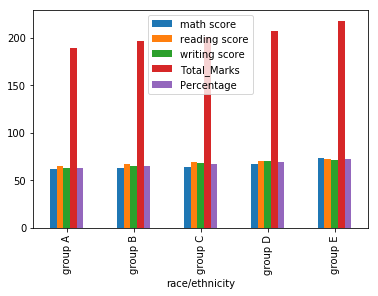

In [22]:

student_report.groupby(['race/ethnicity']).mean().plot(kind='bar')
student_report.groupby(['race/ethnicity']).mean()

###### Student's whose parents have a Master's degree have scored higher compared to others whereas Student's whose parent's went to high school have obtained low marks compared to others

,math score,reading score,writing score,Total_Marks,Percentage
parental level of education,,,,,
associate's degree,67.882883,70.927928,69.896396,208.707207,69.569069
bachelor's degree,69.389831,73.000000,73.381356,215.771186,71.923729
high school,62.137755,64.704082,62.448980,189.290816,63.096939
master's degree,69.745763,75.372881,75.677966,220.796610,73.598870
some college,67.128319,69.460177,68.840708,205.429204,68.476401
some high school,63.497207,66.938547,64.888268,195.324022,65.108007


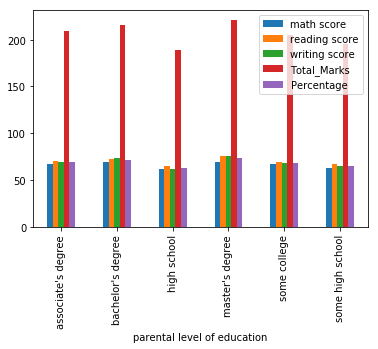

In [23]:

student_report.groupby(['parental level of education']).mean().plot(kind='bar')
student_report.groupby(['parental level of education']).mean()

###### Students who availed standard luch have scored higher in all the three categories compared to students who have taken free/ reduced lunch.

,math score,reading score,writing score,Total_Marks,Percentage
lunch,,,,,
free/reduced,58.921127,64.653521,63.022535,186.597183,62.199061
standard,70.034109,71.654264,70.823256,212.511628,70.837209


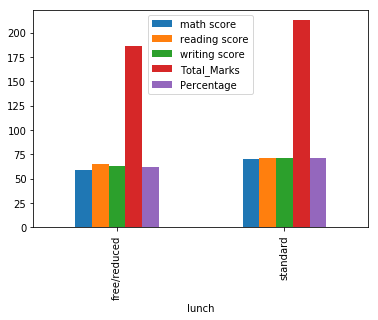

In [24]:

student_report.groupby(['lunch']).mean().plot(kind='bar')
student_report.groupby(['lunch']).mean()

,math score,reading score,writing score,Total_Marks,Percentage
test preparation course,,,,,
completed,69.695531,73.893855,74.418994,218.008380,72.669460
none,64.077882,66.534268,64.504673,195.116822,65.038941


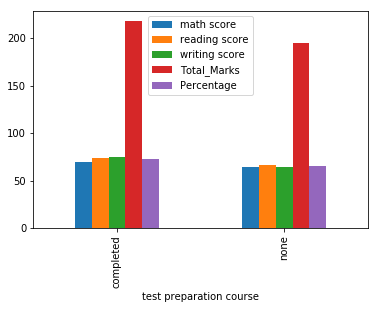

In [25]:
student_report.groupby(['test preparation course']).mean().plot(kind='bar')
student_report.groupby(['test preparation course']).mean()

#### Students Who completed their test preparation courses got more marks compared to others who did not completed their course

## CONCLUSION
Finally, What I observed is ,

1.Students percentage is correlated with Groups Average Percentage.

     ex: Average student from Group E have scored more compared to Group A's average Student.
2.Parents Degree is also a bit correlated.

    Student's whose parents have a Master's degree have scored higher compared to others whereas Student's whose parent's went to high school have obtained low marks compared to others

3.Female Students Percentage is higher than Male Students


4.Students Who took courses have benefitted.
    
    Students Who completed their test preparation courses got more marks compared to others who did not completed their course

5.Students who took standard lunch has scored well.

    Students who availed standard luch have scored higher in all the three categories compared to students who have taken free/ reduced lunch.

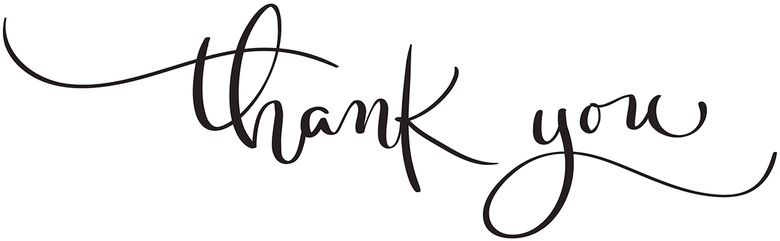